In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rcParams['figure.figsize'] = 12, 6

# Масштабування ознак (Feature scaling)

In [ ]:
toy_df = pd.DataFrame({
    'Normal': np.random.normal(100, 50, 1000),
    'Exponential': np.random.exponential(25, 1000),
    'Uniform': np.random.uniform(-250, -50, 1000)
})

In [ ]:
toy_df.head()

,Normal,Exponential,Uniform
0,89.402387,13.828225,-214.442026
1,95.983137,26.425797,-225.776302
2,120.269889,20.110119,-127.230431
3,105.930329,7.232088,-106.717975
4,162.720703,9.790990,-192.499325


In [ ]:
def plot_scaling_result(data, scaled_data, scaling_title, x_lim=(-5, 5)):
    scaled_df = pd.DataFrame(
      scaled_data, 
      columns=['Normal', 'Exponential', 'Uniform']
    )

    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.set_xlim((-300, 300))
    ax1.set_title('No Scaling')
    sns.kdeplot(data.Normal, ax=ax1, label='Normal')
    sns.kdeplot(data.Exponential, ax=ax1, label='Exponential')
    sns.kdeplot(data.Uniform, ax=ax1, label='Uniform')

    ax2.set_xlim(x_lim)
    ax2.set_title(scaling_title)
    sns.kdeplot(scaled_df.Normal, ax=ax2, label='Normal')
    sns.kdeplot(scaled_df.Exponential, ax=ax2, label='Exponential')
    sns.kdeplot(scaled_df.Uniform, ax=ax2, label='Uniform')
    plt.legend();

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

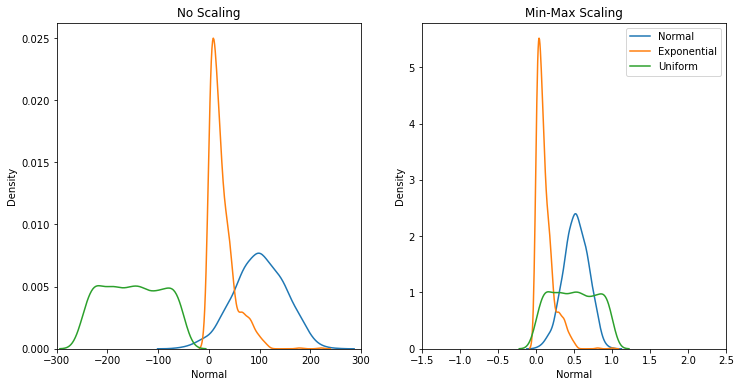

In [ ]:
min_max_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(toy_df)
plot_scaling_result(toy_df, min_max_scaled, 'Min-Max Scaling', (-1.5, 2.5))

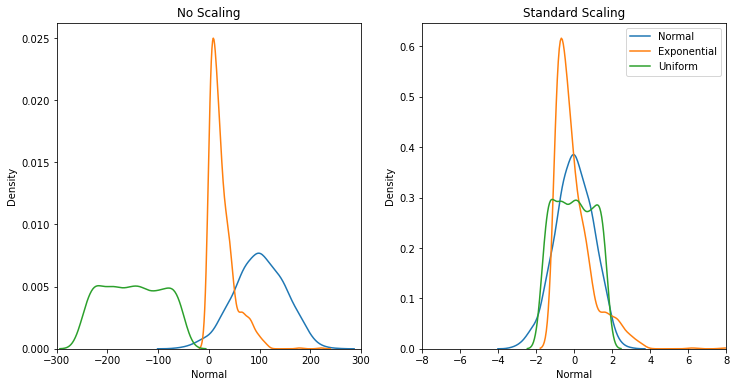

In [ ]:
std_scaled = StandardScaler().fit_transform(toy_df)
plot_scaling_result(toy_df, std_scaled, 'Standard Scaling', (-8, 8))

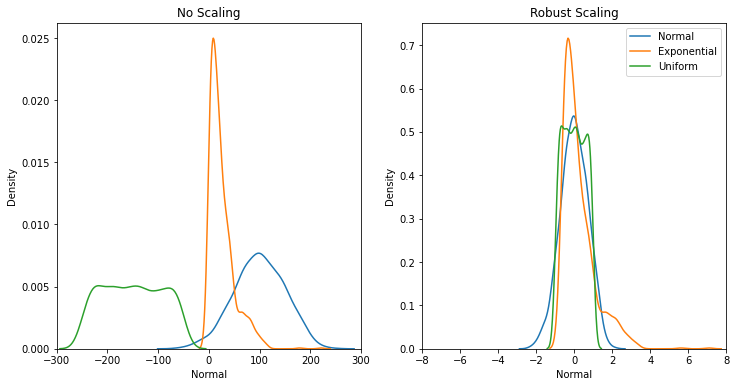

In [ ]:
robust_scaled = RobustScaler().fit_transform(toy_df)
plot_scaling_result(toy_df, robust_scaled, 'Robust Scaling', (-8, 8))

## Побудуємо модель одномірної лінійної регресії

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
print(dataset.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
target_col_name = dataset['target_names'][0]
df[target_col_name] = dataset['target']
del dataset

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
X = pd.DataFrame(df['MedInc'])
y = df[target_col_name]

## Виділяємо train/test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=test_size, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(16512, 1) (16512,)
(4128, 1) (4128,)


## Навчаємо модель одномірної лінійної регресії

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([0.41933849]), 0.4445972916907879)

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

## Оцінюємо якість моделі

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def get_metrics(y_true, y_predicted, n_digits=5):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    rmse = mean_squared_error(**params, squared=False)
    return dict(mse=round(mse, n_digits), rmse=round(rmse, n_digits))

In [ ]:
get_metrics(y_train, y_train_pred)

{'mse': 0.69914, 'rmse': 0.83615}

In [ ]:
get_metrics(y_test, y_test_pred)

{'mse': 0.70912, 'rmse': 0.84209}

Бачимо мінімальну різницю у помилках – це добре. Навіщо її аналізувати – дізнаємось у наступній лекції.
Подивимося на взаємозв'язок передбачень та значень залежної змінної.

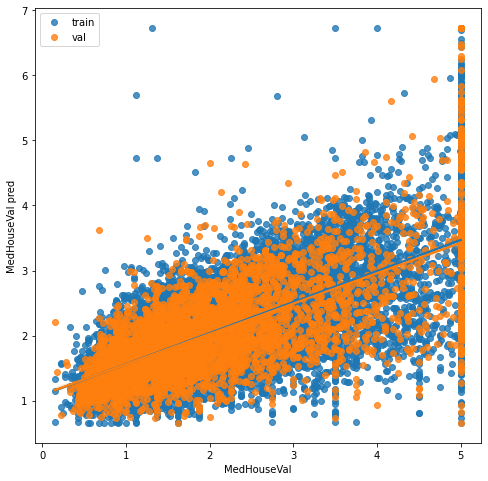

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_train, y=y_train_pred, label='train')
sns.regplot(x=y_test, y=y_test_pred, label='val')
plt.ylabel(f'{target_col_name} pred')
plt.legend();

Ми передбачаємо одну лінію для всіх наборів даних.

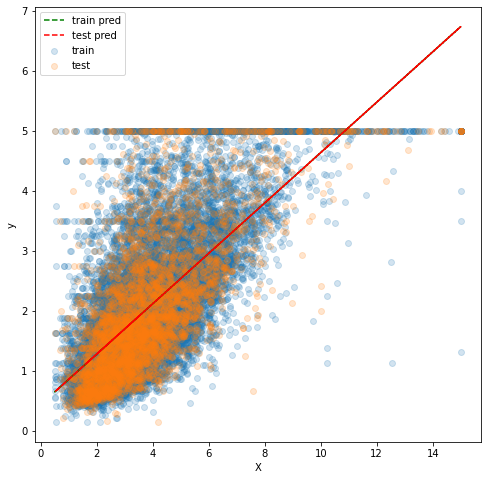

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train, label='train', alpha=0.2)
plt.plot(X_train, y_train_pred, label='train pred', color='g', linestyle='dashed')
plt.scatter(X_test, y_test, label='test', alpha=0.2)
plt.plot(X_test, y_test_pred, label='test pred', color='r', linestyle='dashed')

plt.xlabel('X')
plt.ylabel('y')
plt.legend();

Seaborn [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
Plot data and a linear regression model fit.

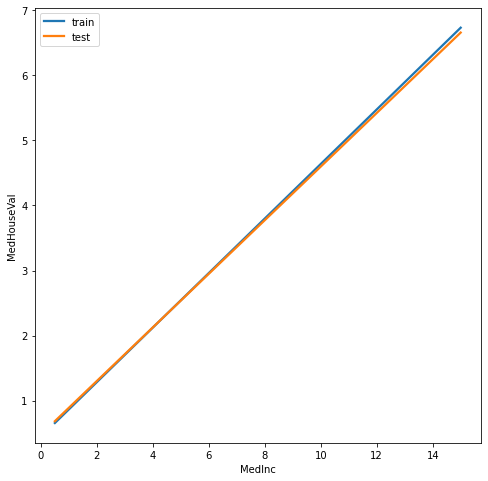

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(x=X_train, y=y_train, label='train', scatter_kws={'alpha':0.1}, scatter=False, ci=0)
sns.regplot(x=X_test, y=y_test, label='test',scatter_kws={'alpha':0.1}, scatter=False, ci=0)
plt.legend();

# Багатомірна лінійна регресія

In [ ]:
def get_indices(X):
    train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    return train_id, test_id

In [ ]:
X = df.drop([target_col_name],axis=1)
y = df[target_col_name]

In [ ]:
X.index

RangeIndex(start=0, stop=20640, step=1)

Будемо виділяти підвибірки за допомогою індексів.

In [ ]:
test_size = 0.2

train_id, test_id = get_indices(X)

In [ ]:
X.loc[train_id].shape, X.loc[test_id].shape

((16512, 8), (4128, 8))

In [ ]:
lr = LinearRegression()

lr.fit(X.loc[train_id], y.loc[train_id])

lr.n_features_in_

8

In [ ]:
lr.coef_, lr.intercept_

(array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
        -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01]),
 -37.02327770606412)

In [ ]:
y_train_pred = lr.predict(X.loc[train_id])
y_test_pred = lr.predict(X.loc[test_id])

In [ ]:
get_metrics(y.loc[train_id], y_train_pred)

{'mse': 0.51793, 'rmse': 0.71968}

In [ ]:
get_metrics(y.loc[test_id], y_test_pred)

{'mse': 0.55589, 'rmse': 0.74558}

Бачимо, що якість наших прогнозів покращала. Порівнюємо моделі тільки по mse на test наборі. 

Виведемо графік помилок.

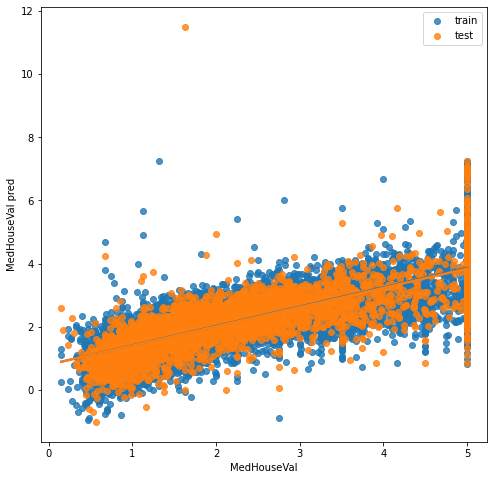

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(x=y.loc[train_id], y=y_train_pred, label='train')
sns.regplot(x=y.loc[test_id], y=y_test_pred, label='test')
plt.ylabel(f'{target_col_name} pred')
plt.legend();

Бачимо, що точки більше зосереджені навколо діагоналі – це означає модель краща, помилки менші.

# Функція підрахунку метрик моделі

Далі ми навчатимемо багато моделей, тому визначимо функцію, яка вважає метрики на трейні та тесті.

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = get_metrics(y_train, y_train_pred)
    test_metrics = get_metrics(y_test, y_test_pred)

    return dict(train=train_metrics, test=test_metrics)

# Багатомірна лін. регресія на відмасштабованих ознаках
Перевіримо, чи впливатиме нормалізація даних на точність передбачення на валідаційних даних

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X.loc[train_id])
min_max_scaled = min_max_scaler.transform(X)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=X.columns)

In [ ]:
min_max_scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032195,0.030168,0.039869,0.001914,0.327858,0.476125
std,0.131020,0.246776,0.017545,0.018729,0.031740,0.008358,0.227229,0.199555
min,0.000000,0.000000,-0.000303,0.000000,0.000000,0.000000,-0.001064,0.000000
25%,0.142308,0.333333,0.025187,0.026588,0.021974,0.001398,0.146809,0.253984
50%,0.209301,0.549020,0.030777,0.028275,0.032596,0.001711,0.181915,0.583665
75%,0.292641,0.705882,0.036615,0.030281,0.048264,0.002084,0.548936,0.631474
max,1.000000,1.000000,1.000000,1.333174,1.000000,1.000000,1.000000,1.000000


In [ ]:
lr = LinearRegression()
lr.fit(min_max_scaled_df.loc[train_id], y.loc[train_id])

LinearRegression()

In [ ]:
evaluate_model(lr, min_max_scaled_df.loc[train_id], min_max_scaled_df.loc[test_id], y.loc[train_id], y.loc[test_id])

{'train': {'mse': 0.51793, 'rmse': 0.71968},
 'test': {'mse': 0.55589, 'rmse': 0.74558}}

Бачимо, що скейлінг нічого не дав. Експериментуємо далі.

## Інтерпретуємо коефіцієнти лінійної регресії.
Інтерпретація можлива, тільки якщо всі змінні в одній шкалі від 0 до 1.
Коефіцієнт -  це сила впливу фактору х на середнє значення залежної змінної у. (або у середнє, якщо регресія множинна), при зміні фактору х на одиницю.

'+' означає, що є позитивний вплив х на у, 

'-' - що є негативний вплив(зворотній звьязок).

In [ ]:
lr.coef_

array([  6.50587593,   0.49593713, -17.39108272,  19.81593931,
        -0.07241483,  -4.38194802,  -3.94604937,  -4.35442897])

Виведемо важливість ознак:

Feature: MedInc, Score: 6.506
Feature: HouseAge, Score: 0.496
Feature: AveRooms, Score: -17.391
Feature: AveBedrms, Score: 19.816
Feature: Population, Score: -0.072
Feature: AveOccup, Score: -4.382
Feature: Latitude, Score: -3.946
Feature: Longitude, Score: -4.354


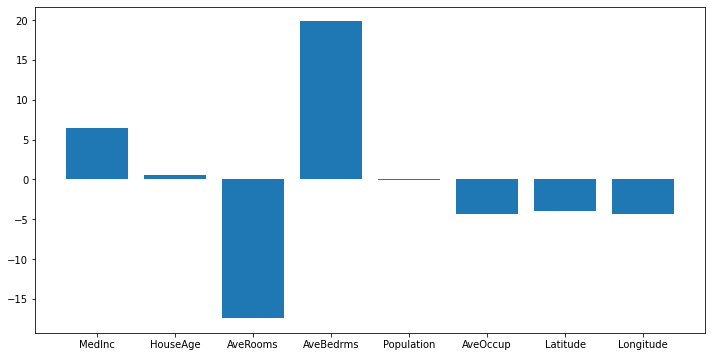

In [ ]:
importance = lr.coef_
for feature_name, value in zip(X.columns, importance):
    print(f'Feature: {feature_name}, Score: {value:.3f}')

# построим график
xticks = range(len(importance))
plt.bar(xticks, importance)
plt.xticks()
plt.xticks(xticks, X.columns)
plt.show()

виглядає так, що AveBedrms має найбільш позитивний вплив на ціну, а AveRooms - найбільш негативний. Щось не дуже логічно. Але кількість спалень, точно залежить від кількості кімнат. При чому лінійно. А це вловлює алгоритм лінійної регресії.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other **independent** variables constant.


In [ ]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Це явище називається мультиколінеарністю. Стаття на цю тему [тут](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) 

На intercept_ зберігається деяке базове значення передбачення, без урахування впливу ознак.

In [ ]:
lr.intercept_

# Поліноміальна регресія

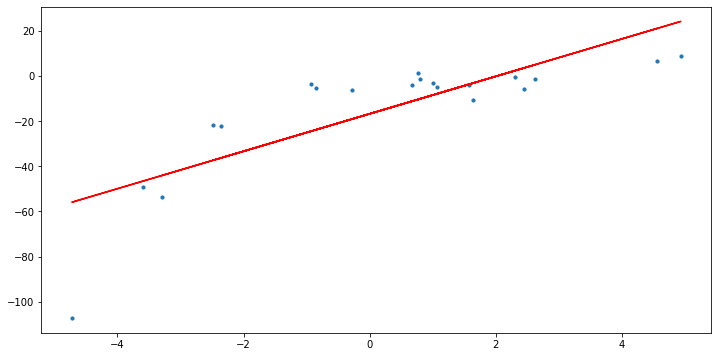

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
get_metrics(y, y_pred)

{'mse': 253.07218, 'rmse': 15.90824}

In [ ]:
import operator 

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def fit_poly_reg(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    display(get_metrics(y, y_poly_pred))
    return y_poly_pred, model

def plot_ploy_reg(x, y, y_poly_pred):
    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

PolynomialFeatures генерують всі поліноміальні комбінації ознак до зазначеної включно. Наприклад, якщо у нас є ознаки а і b, то будуть згенеровані додаткові ознаки [1, a, b, a^2, ab, b^2].

In [ ]:
y_poly_pred, model = fit_poly_reg(x, y, 2)

{'mse': 102.42325, 'rmse': 10.12044}

In [ ]:
model.n_features_in_

3

У нас три ознаки, бо 1, х та х^2.

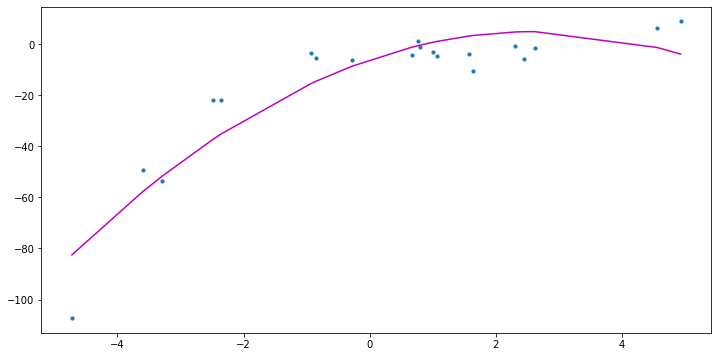

In [ ]:
plot_ploy_reg(x, y, y_poly_pred)

Стало значно краще!

{'mse': 11.90178, 'rmse': 3.4499}

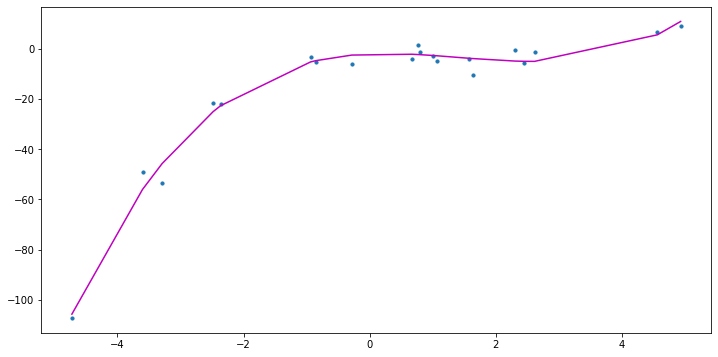

In [ ]:
degree = 3
y_poly_pred, _ = fit_poly_reg(x, y, degree)
plot_ploy_reg(x, y, y_poly_pred)

Стало ще краще.

{'mse': 1.23913, 'rmse': 1.11316}

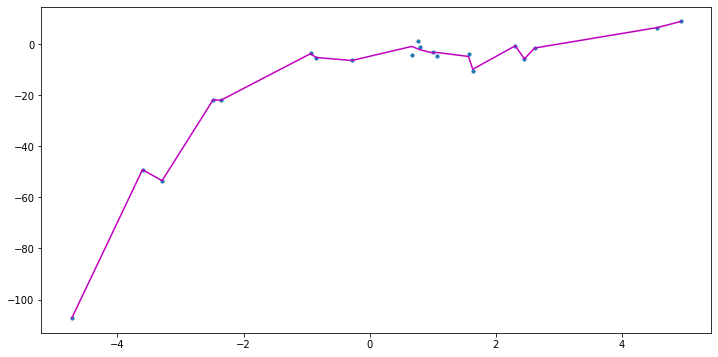

In [ ]:
degree = 20
y_poly_pred, _ = fit_poly_reg(x, y, degree)
plot_ploy_reg(x, y, y_poly_pred)

А ось це вже перенавчання.

## Застосування поліноміальної регресії на California Housing даних

## Одна ознака

Спочатку подивимося як впливає наявність поліноміальних ознак у разі 1 ознаки

In [ ]:
X = pd.DataFrame(df['MedInc'])
y = df[target_col_name]

In [ ]:
X.shape

(20640, 1)

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  
# трансформує існуючий набір ознак на набір ознак вищої розмірності
X_train_poly = poly_features.fit_transform(X.loc[train_id])
X_test_poly = poly_features.transform(X.loc[test_id])

# трансформує існуючий набір ознак на набір ознак вищої розмірності
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y.loc[train_id])

LinearRegression()

In [ ]:
X_train_poly.shape

(16512, 2)

In [ ]:
X_train_poly

array([[ 3.2596    , 10.62499216],
       [ 3.8125    , 14.53515625],
       [ 4.1563    , 17.27482969],
       ...,
       [ 2.9344    ,  8.61070336],
       [ 5.7192    , 32.70924864],
       [ 2.5755    ,  6.63320025]])

In [ ]:
evaluate_model(poly_model, X_train_poly, X_test_poly, y.loc[train_id], y.loc[test_id])

{'train': {'mse': 0.69299, 'rmse': 0.83246},
 'test': {'mse': 0.70327, 'rmse': 0.83861}}

Якість не покращилась, але ми вже бачили, що з цією фічею є чітка лінійна залежність

In [ ]:
poly_model.n_features_in_

2

## Багато ознак

А якщо використовуємо на всіх ознаках?

In [ ]:
X = df.drop([target_col_name],axis=1)
y = df[target_col_name]

In [ ]:
X.shape

(20640, 8)

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X.loc[train_id])
X_test_poly = poly_features.transform(X.loc[test_id])

In [ ]:
X_train_poly

array([[ 1.00000000e+00,  3.25960000e+00,  3.30000000e+01, ...,
         1.06994410e+03, -3.82805130e+03,  1.36960209e+04],
       [ 1.00000000e+00,  3.81250000e+00,  4.90000000e+01, ...,
         1.14041290e+03, -3.99026320e+03,  1.39617856e+04],
       [ 1.00000000e+00,  4.15630000e+00,  4.00000000e+00, ...,
         1.20131560e+03, -4.17583680e+03,  1.45154304e+04],
       ...,
       [ 1.00000000e+00,  2.93440000e+00,  3.60000000e+01, ...,
         1.15804090e+03, -4.02847140e+03,  1.40138244e+04],
       [ 1.00000000e+00,  5.71920000e+00,  1.50000000e+01, ...,
         1.41225640e+03, -4.58325680e+03,  1.48742416e+04],
       [ 1.00000000e+00,  2.57550000e+00,  5.20000000e+01, ...,
         1.42657290e+03, -4.62380340e+03,  1.49866564e+04]])

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y.loc[train_id])

LinearRegression()

In [ ]:
evaluate_model(poly_model, X_train_poly, X_test_poly, y.loc[train_id], y.loc[test_id])

{'train': {'mse': 0.42073, 'rmse': 0.64863},
 'test': {'mse': 0.4643, 'rmse': 0.6814}}

Бачимо, що помилки значно зменшились, а отже якість моделі стала кращою.

Замість 8 ознак у нас стало 45, що більш ніж у 5 разів більше.

In [ ]:
poly_model.n_features_in_

45

# Регресії з регуляризацією

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
models = [
    Ridge(), Lasso(), ElasticNet(), ElasticNet(alpha=0.5)
]

Параметри ElasticNet по замовчуванню:

In [ ]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
for model in models:
    model.fit(X.loc[train_id], y.loc[train_id])
    eval_results  = evaluate_model(model, X.loc[train_id], X.loc[test_id], y.loc[train_id], y.loc[test_id])
    print(f'{str(model)}: {eval_results}\n')

Ridge(): {'train': {'mse': 0.51793, 'rmse': 0.71968}, 'test': {'mse': 0.5558, 'rmse': 0.74552}}

Lasso(): {'train': {'mse': 0.94857, 'rmse': 0.97394}, 'test': {'mse': 0.93803, 'rmse': 0.96852}}

ElasticNet(): {'train': {'mse': 0.76601, 'rmse': 0.87522}, 'test': {'mse': 0.76456, 'rmse': 0.87439}}

ElasticNet(alpha=0.5): {'train': {'mse': 0.68132, 'rmse': 0.82542}, 'test': {'mse': 0.68687, 'rmse': 0.82878}}



Бачимо, що від вхідних параметрв моделі залежить її якість. Тому вартує знати, як саме обрати оптимальні параметри =)